# API 테스트

In [1]:
from bs4 import BeautifulSoup 
from urllib.request import urlopen

In [2]:
endpoint = "http://openapi.reb.or.kr/OpenAPI_ToolInstallPackage/service/rest/RealEstateTradingSvc/getRealEstateTradingCount"
serviceKey = "발급받은 키를 입력하세요"

startmonth = "201301"
endmonth = "201312"
region = "11000"
tradingtype="01"

url = endpoint + "?" \
        "serviceKey=" + serviceKey + \
        "&" + "startmonth=" + startmonth + \
        "&" + "endmonth=" + endmonth + \
        "&" + "region=" + region + \
        "&" + "tradingtype=" + tradingtype

In [3]:
print(url)

http://openapi.reb.or.kr/OpenAPI_ToolInstallPackage/service/rest/RealEstateTradingSvc/getRealEstateTradingCount?serviceKey=Oq7cura%2F5H1FzkiBoJ5UpZdCr6Q61Zk%2B6xaZFMuXi3TNuvZi6fc78u%2F14aUg%2BrvLlpWL2pJPdWkICKbt%2Fhb7lQ%3D%3D&startmonth=201301&endmonth=201312&region=11000&tradingtype=01


In [4]:
html = urlopen(url)
bs_obj = BeautifulSoup(html, "html.parser")

In [5]:
print(bs_obj)

<?xml version="1.0" encoding="UTF-8" standalone="yes"?><response><header><resultcode>00</resultcode><resultmsg>NORMAL SERVICE.</resultmsg></header><body><item><regioncd>11000</regioncd><regionnm>서울</regionnm><rsrow>201301,9917|201302,10028|201303,15322|201304,17911|201305,19902|201306,25636|201307,13051|201308,12902|201309,14378|201310,20262|201311,19293|201312,21605</rsrow></item></body></response>


# 전체 코드

In [6]:
from bs4 import BeautifulSoup 
from urllib.request import urlopen

endpoint = "http://openapi.reb.or.kr/OpenAPI_ToolInstallPackage/service/rest/RealEstateTradingSvc/getRealEstateTradingCount"
serviceKey = "발급받은 키를 입력하세요"

startmonth = "201301"
endmonth = "201312"
region = "11000"
tradingtype="01"

url = endpoint + "?" \
        "serviceKey=" + serviceKey + \
        "&" + "startmonth=" + startmonth + \
        "&" + "endmonth=" + endmonth + \
        "&" + "region=" + region + \
        "&" + "tradingtype=" + tradingtype

html = urlopen(url)
bs_obj = BeautifulSoup(html, "html.parser")
print(bs_obj)

<?xml version="1.0" encoding="UTF-8" standalone="yes"?><response><header><resultcode>00</resultcode><resultmsg>NORMAL SERVICE.</resultmsg></header><body><item><regioncd>11000</regioncd><regionnm>서울</regionnm><rsrow>201301,9917|201302,10028|201303,15322|201304,17911|201305,19902|201306,25636|201307,13051|201308,12902|201309,14378|201310,20262|201311,19293|201312,21605</rsrow></item></body></response>


# 종로구 아파트 거래 건수 확인하기

In [7]:
from bs4 import BeautifulSoup 
from urllib.request import urlopen

In [8]:
endpoint = "http://openapi.reb.or.kr/OpenAPI_ToolInstallPackage/service/rest/RealEstateTradingSvc/getRealEstateTradingCount"
serviceKey = "발급받은 키를 입력하세요"

startmonth = "201901"
endmonth = "202012"
region = "11110"
tradingtype="05"

url = endpoint + "?" \
        "serviceKey=" + serviceKey + \
        "&" + "startmonth=" + startmonth + \
        "&" + "endmonth=" + endmonth + \
        "&" + "region=" + region + \
        "&" + "tradingtype=" + tradingtype

In [9]:
html = urlopen(url)
bs_obj = BeautifulSoup(html, "html.parser")
print(bs_obj)

<?xml version="1.0" encoding="UTF-8" standalone="yes"?><response><header><resultcode>00</resultcode><resultmsg>NORMAL SERVICE.</resultmsg></header><body><item><regioncd>11110</regioncd><regionnm>종로구</regionnm><rsrow>201901,51|201902,56|201903,78|201904,64|201905,43|201906,55|201907,75|201908,83|201909,63|201910,79|201911,115|201912,204|202001,194|202002,91|202003,104|202004,55|202005,68|202006,106|202007,173|202008,80|202009,57|202010,51|202011,100|202012,102</rsrow></item></body></response>


In [10]:
regi = bs_obj.find("regionnm").text
print(regi)

종로구


In [11]:
trade = bs_obj.find("rsrow").text

In [12]:
print(trade)

201901,51|201902,56|201903,78|201904,64|201905,43|201906,55|201907,75|201908,83|201909,63|201910,79|201911,115|201912,204|202001,194|202002,91|202003,104|202004,55|202005,68|202006,106|202007,173|202008,80|202009,57|202010,51|202011,100|202012,102


In [13]:
data = trade.split('|')

In [14]:
print(data)

['201901,51', '201902,56', '201903,78', '201904,64', '201905,43', '201906,55', '201907,75', '201908,83', '201909,63', '201910,79', '201911,115', '201912,204', '202001,194', '202002,91', '202003,104', '202004,55', '202005,68', '202006,106', '202007,173', '202008,80', '202009,57', '202010,51', '202011,100', '202012,102']


In [15]:
value = data[0].split(',')
print(value)

['201901', '51']


In [16]:
row = [regi, value[0], int(value[1])]
print(row)

['종로구', '201901', 51]


In [17]:
import pandas as pd
df = pd.DataFrame(columns=['지역', '날짜', '거래건수'])

In [18]:
df

,지역,날짜,거래건수


In [19]:
col = df.columns
print(col)

Index(['지역', '날짜', '거래건수'], dtype='object')


In [20]:
df_row = pd.Series(row, index=col)

In [21]:
df_row

지역         종로구
날짜      201901
거래건수        51
dtype: object

In [22]:
df.append(df_row, ignore_index=True)

,지역,날짜,거래건수
0,종로구,201901,51


In [23]:
n = len(data)

In [24]:
for i in range(0, n):
    value = data[i].split(',')
    row = [regi, value[0], int(value[1])]
    df_row = pd.Series(row, index=col)
    df = df.append(df_row, ignore_index=True)

In [25]:
df

,지역,날짜,거래건수
0,종로구,201901,51
1,종로구,201902,56
2,종로구,201903,78
3,종로구,201904,64
4,종로구,201905,43
5,종로구,201906,55
6,종로구,201907,75
7,종로구,201908,83
8,종로구,201909,63
9,종로구,201910,79


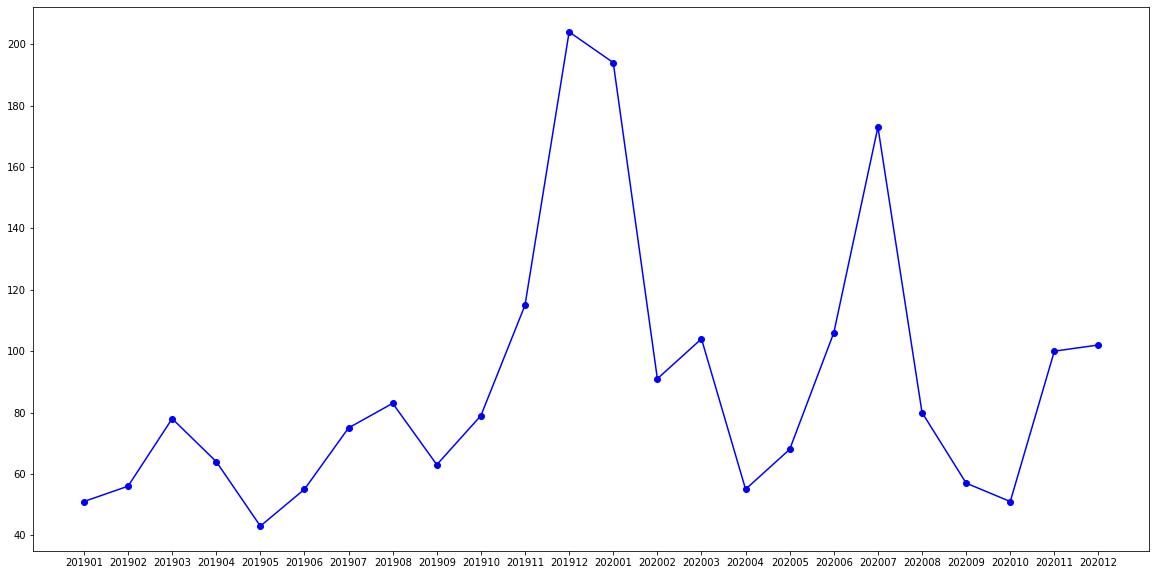

In [26]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plt.plot(df['날짜'], df['거래건수'], color='b', marker='o')
plt.show()

In [27]:
# 전체 코드

<?xml version="1.0" encoding="UTF-8" standalone="yes"?><response><header><resultcode>00</resultcode><resultmsg>NORMAL SERVICE.</resultmsg></header><body><item><regioncd>11110</regioncd><regionnm>종로구</regionnm><rsrow>201901,51|201902,56|201903,78|201904,64|201905,43|201906,55|201907,75|201908,83|201909,63|201910,79|201911,115|201912,204|202001,194|202002,91|202003,104|202004,55|202005,68|202006,106|202007,173|202008,80|202009,57|202010,51|202011,100|202012,102</rsrow></item></body></response>
종로구
Index(['지역', '날짜', '거래건수'], dtype='object')


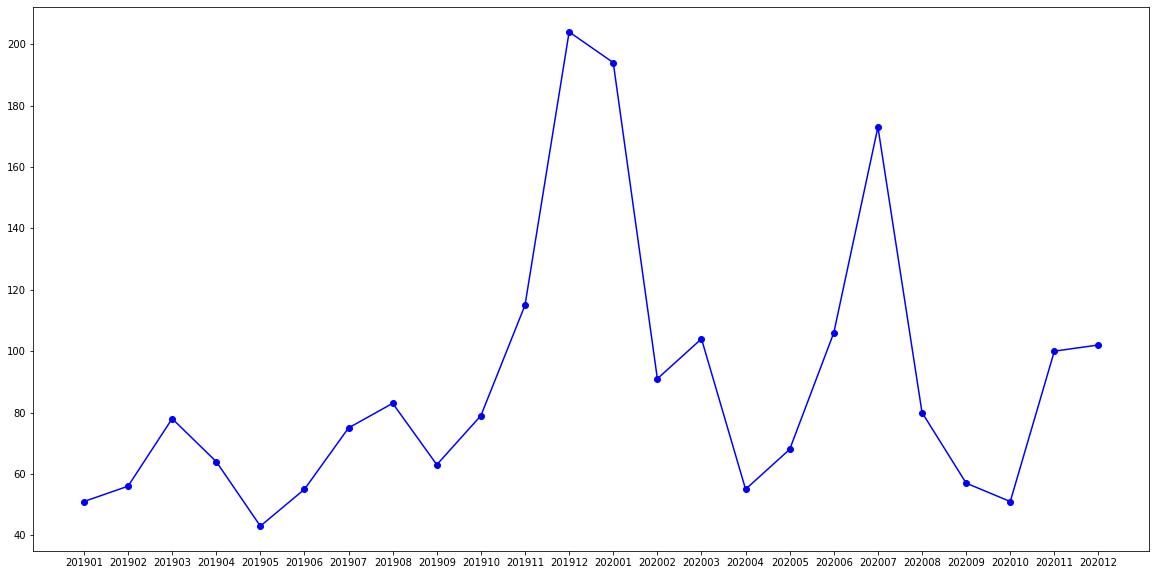

In [28]:
from bs4 import BeautifulSoup 
from urllib.request import urlopen
import pandas as pd
import matplotlib.pyplot as plt

endpoint="http://openapi.reb.or.kr/OpenAPI_ToolInstallPackage/service/rest/RealEstateTradingSvc/getRealEstateTradingCount"
serviceKey="발급받은 키를 입력하세요"

startmonth = "201901"
endmonth = "202012"
region = "11110"
tradingtype="05"

url = endpoint + "?" \
        "serviceKey=" + serviceKey + \
        "&" + "startmonth=" + startmonth + \
        "&" + "endmonth=" + endmonth + \
        "&" + "region=" + region + \
        "&" + "tradingtype=" + tradingtype

html = urlopen(url)
bs_obj = BeautifulSoup(html, "html.parser")
print(bs_obj)

regi = bs_obj.find("regionnm").text
print(regi)

trade = bs_obj.find("rsrow").text
data = trade.split('|')

df = pd.DataFrame(columns=['지역', '날짜', '거래건수'])
col = df.columns
print(col)

n = len(data)
for i in range(0, n):
    value = data[i].split(',')
    row = [regi, value[0], int(value[1])]
    df_row = pd.Series(row, index=col)
    df = df.append(df_row, ignore_index=True)
    
plt.figure(figsize=(20, 10))
plt.plot(df['날짜'], df['거래건수'], color='b', marker='o')
plt.show()

# 여러 지역 아파트 거래건 수 비교하기

### 11110 : 종로구
### 11215 : 광진구
### 11620 : 관악구

In [29]:
from bs4 import BeautifulSoup 
from urllib.request import urlopen
import pandas as pd
import matplotlib.pyplot as plt

endpoint = "http://openapi.reb.or.kr/OpenAPI_ToolInstallPackage/service/rest/RealEstateTradingSvc/getRealEstateTradingCount"
serviceKey = "발급받은 키를 입력하세요"

startmonth = "201901"
endmonth = "202012"
region = ["11110", "11215", "11620"]
tradingtype="05"

In [30]:
m = len(region)

In [31]:
df = pd.DataFrame(columns=['지역', '날짜', '거래건수'])
col = df.columns

In [32]:
for j in range(0, m):
    url = endpoint + "?" \
            "serviceKey=" + serviceKey + \
            "&" + "startmonth=" + startmonth + \
            "&" + "endmonth=" + endmonth + \
            "&" + "region=" + region[j] + \
            "&" + "tradingtype=" + tradingtype

    html = urlopen(url)
    bs_obj = BeautifulSoup(html, "html.parser")

    regi = bs_obj.find("regionnm").text
    trade = bs_obj.find("rsrow").text
    data = trade.split('|')

    n = len(data)
    for i in range(0, n):
        value = data[i].split(',')
        row = [regi, value[0], int(value[1])]
        df_row = pd.Series(row, index=col)
        df = df.append(df_row, ignore_index=True)

In [33]:
df

,지역,날짜,거래건수
0,종로구,201901,51
1,종로구,201902,56
2,종로구,201903,78
3,종로구,201904,64
4,종로구,201905,43
...,...,...,...
67,관악구,202008,275
68,관악구,202009,404
69,관악구,202010,227
70,관악구,202011,195


In [34]:
df01 = df[df['지역']=='종로구']
df02 = df[df['지역']=='광진구']
df03 = df[df['지역']=='관악구']

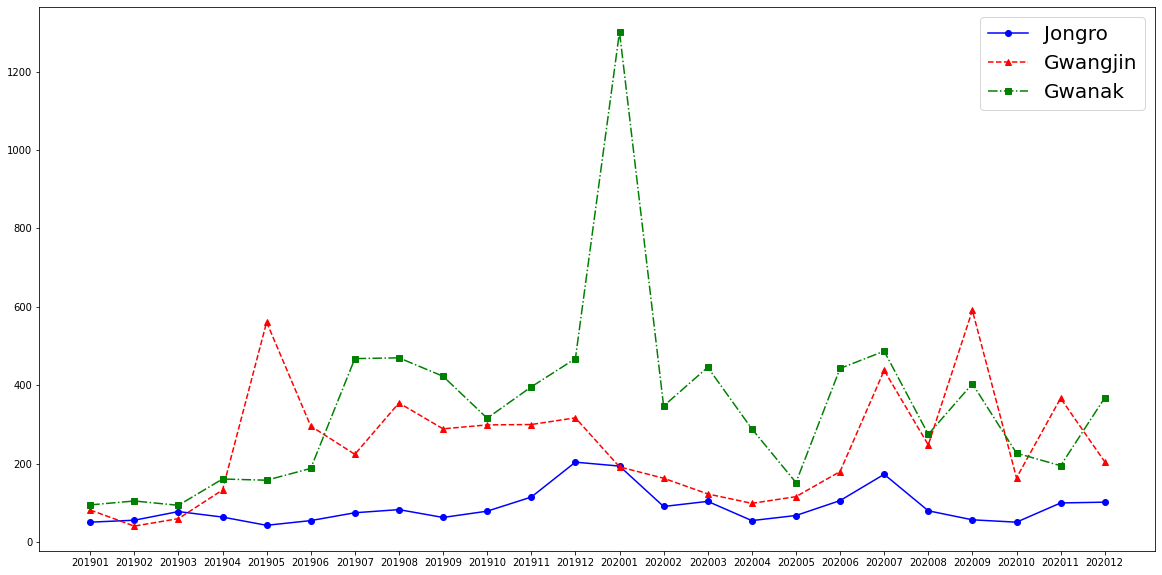

In [35]:
plt.figure(figsize=(20, 10))
plt.plot(df01['날짜'], df01['거래건수'], color='b', marker='o', linestyle='-', label='Jongro')
plt.plot(df02['날짜'], df02['거래건수'], color='r', marker='^', linestyle='--', label='Gwangjin')
plt.plot(df03['날짜'], df03['거래건수'], color='g', marker='s', linestyle='-.', label='Gwanak')
plt.legend(fontsize=20)
plt.show()

In [36]:
# 전체 코드

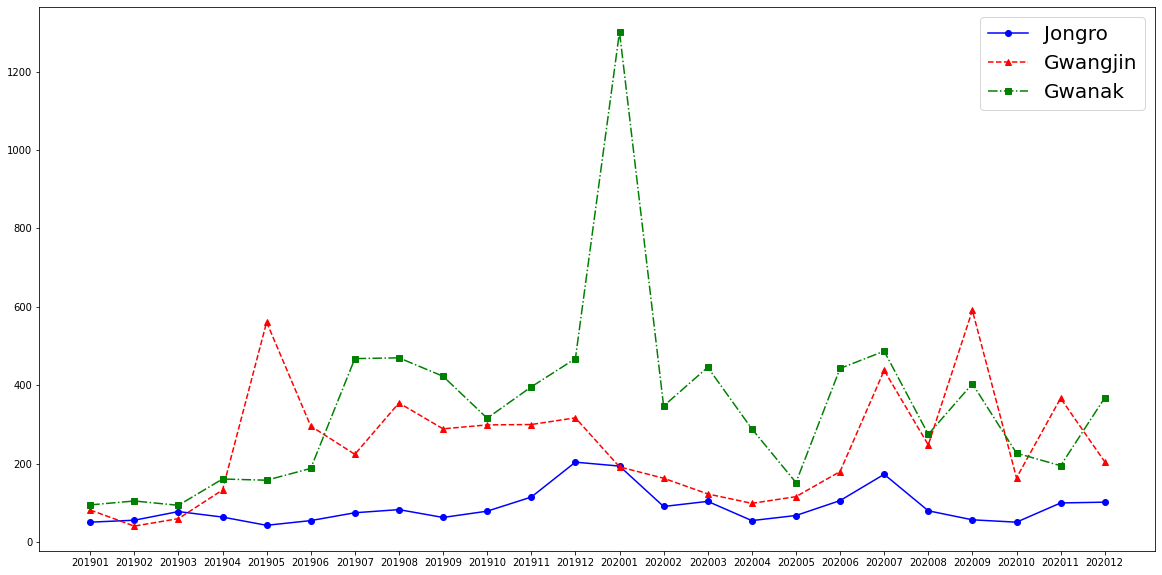

In [37]:
from bs4 import BeautifulSoup 
from urllib.request import urlopen
import pandas as pd
import matplotlib.pyplot as plt

endpoint = "http://openapi.reb.or.kr/OpenAPI_ToolInstallPackage/service/rest/RealEstateTradingSvc/getRealEstateTradingCount"
serviceKey = "발급받은 키를 입력하세요"

startmonth = "201901"
endmonth = "202012"
region = ["11110", "11215", "11620"]
tradingtype="05"

m = len(region)
df = pd.DataFrame(columns=['지역', '날짜', '거래건수'])
col = df.columns
for j in range(0, m):
    url = endpoint + "?" \
            "serviceKey=" + serviceKey + \
            "&" + "startmonth=" + startmonth + \
            "&" + "endmonth=" + endmonth + \
            "&" + "region=" + region[j] + \
            "&" + "tradingtype=" + tradingtype

    html = urlopen(url)
    bs_obj = BeautifulSoup(html, "html.parser")

    regi = bs_obj.find("regionnm").text
    trade = bs_obj.find("rsrow").text
    data = trade.split('|')

    n = len(data)
    for i in range(0, n):
        value = data[i].split(',')
        row = [regi, value[0], int(value[1])]
        df_row = pd.Series(row, index=col)
        df = df.append(df_row, ignore_index=True)

df01 = df[df['지역']=='종로구']
df02 = df[df['지역']=='광진구']
df03 = df[df['지역']=='관악구']

plt.figure(figsize=(20, 10))
plt.plot(df01['날짜'], df01['거래건수'], color='b', marker='o', linestyle='-', label='Jongro')
plt.plot(df02['날짜'], df02['거래건수'], color='r', marker='^', linestyle='--', label='Gwangjin')
plt.plot(df03['날짜'], df03['거래건수'], color='g', marker='s', linestyle='-.', label='Gwanak')
plt.legend(fontsize=20)
plt.show()

# CSV 파일로 저장하기

In [38]:
df

,지역,날짜,거래건수
0,종로구,201901,51
1,종로구,201902,56
2,종로구,201903,78
3,종로구,201904,64
4,종로구,201905,43
...,...,...,...
67,관악구,202008,275
68,관악구,202009,404
69,관악구,202010,227
70,관악구,202011,195


In [41]:
df.to_csv("./trade01.csv")

In [42]:
df.to_csv("./trade02.csv", encoding='CP949')

In [44]:
df.to_csv("./trade03.csv", encoding='CP949', index=False)

## CSV 파일 불러오기

In [52]:
data = pd.read_csv("./trade03.csv",encoding='CP949')

In [53]:
data

,지역,날짜,거래건수
0,종로구,201901,51
1,종로구,201902,56
2,종로구,201903,78
3,종로구,201904,64
4,종로구,201905,43
...,...,...,...
67,관악구,202008,275
68,관악구,202009,404
69,관악구,202010,227
70,관악구,202011,195


# XLSX 파일로 저장하기

In [54]:
df

,지역,날짜,거래건수
0,종로구,201901,51
1,종로구,201902,56
2,종로구,201903,78
3,종로구,201904,64
4,종로구,201905,43
...,...,...,...
67,관악구,202008,275
68,관악구,202009,404
69,관악구,202010,227
70,관악구,202011,195


In [56]:
df.to_excel("./trade04.xlsx", encoding='CP949', index=False)

## CSV 파일 불러오기

In [61]:
data = pd.read_excel("./trade04.xlsx", engine='openpyxl')

In [62]:
data

,지역,날짜,거래건수
0,종로구,201901,51
1,종로구,201902,56
2,종로구,201903,78
3,종로구,201904,64
4,종로구,201905,43
...,...,...,...
67,관악구,202008,275
68,관악구,202009,404
69,관악구,202010,227
70,관악구,202011,195
